In [1]:
import torch
from torchvision import datasets

import time
import random
import matplotlib.pyplot as plt

import numpy as np

from novagrad.tensor import Tensor
from novagrad.nn import MultiLayerPerceptron

In [2]:
x_train = datasets.MNIST('./data', train=True, download=True)
x_test = datasets.MNIST('./data', train=False, download=True)

In [3]:
# Implement small batch (NO EFFICIENCY ON MY MACHINE!!)
xs_train = torch.utils.data.Subset(x_train, [x for x in range(5)])
xs_test = torch.utils.data.Subset(x_test, [x for x in range(2)])

In [4]:
# Check train and test data
print(f"We have {len(xs_train)} images in the training set and {len(xs_test)} images in the test set.")

We have 5 images in the training set and 2 images in the test set.


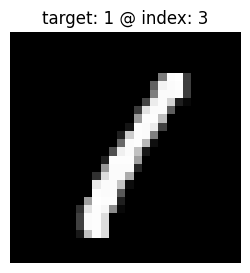

In [5]:
# Visualise images
index = random.randint(0, len(xs_train))
image, target = xs_train[index]

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap="gray")
plt.title("target: {} @ index: {}".format(target, index))
plt.axis(False);

In [6]:
# Load xs (images) and ys (targets) to 1d arrays (normalised with / 255)
xs = ((np.asarray(image).flatten() / 255).tolist() for image, target in xs_train)
    # flatten as currently don't support 2d layers in nn
ys = (np.eye(10, 10, 0)[target].tolist() for image, target in xs_train)

In [7]:
# Intialise the NN
n = MultiLayerPerceptron(784, [128, 10], "tanh")

In [ ]:
# Run the training cycles
x = []
y = []

# 100 epochs takes MANY MANY minutes... need more efficiency plz!
for k in range(5):
    fstart = time.time()
    # forward pass
    ypred = [n(x) for x in xs]
    fend = time.time()

    lstart = time.time()
    loss = 0
    for i in range(0, len(ys)):
        loss += sum([(yout - ygt)**2 for ygt, yout in zip(ys[i], ypred[i])])
    lend = time.time()

    zstart = time.time()
    # zero grad
    n.zero_grad()
    zend = time.time()

    bstart = time.time()
    # backward pass
    loss.backward()
    for p in n.parameters():
        p.data += -0.01 * p.grad
    bend = time.time()
    
    # capture loss over the cycles
    x.append(k)
    y.append(loss.data)

    # print progress
    print("loop: {} forward: {} loss: {} zero: {} backward: {}".format(k, fend-fstart, lend-lstart, zend-zstart, bend-bstart))

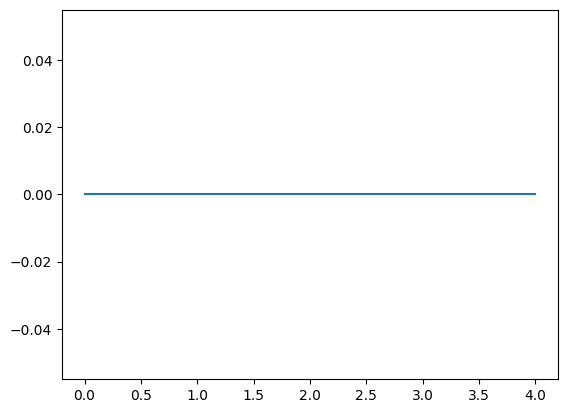

In [44]:
# Visualise the loss function
plt.plot(x, y)

In [45]:
# Visualise prediction
ypred_float = [x.data for x in ypred[index]]
prediction = ypred_float.index(max(ypred_float))

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap="gray")
plt.title("target: {} @ prediction: {}".format(target, prediction))
plt.axis(False);

IndexError: list index out of range

In [46]:
# Calculate the accuracy
tmp = []
ypreds_tmp = []
for y in ypred:
    tmp = []
    for x in y:
        tmp.append(x.data)
    ypreds_tmp.append(tmp)

yss = [target for image, target in xs_train]
ypreds = [x.index(max(x)) for x in ypreds_tmp]

comp = list(zip(yss, ypreds))
correct = [x == y for x, y in comp]
accuracy = sum(correct) / len(comp)

print("Accuracy = {}".format(accuracy))
print(comp)

ZeroDivisionError: division by zero

# 